In [101]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../Classes')

import Regression

from importlib import reload
reload(Regression)
#reload(Optimisation)
from Regression import *




# Define a linear function and sample it

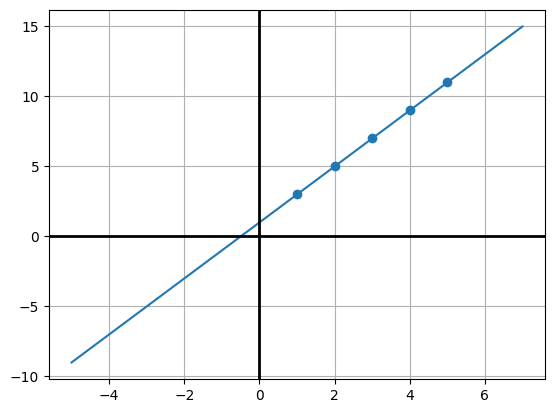

In [102]:
def linear(x):
    return 2*x + 1


points = np.array([1., 2., 3., 4., 5.])
xs = np.linspace(-5, 7, 100)
fig, ax = plt.subplots()

ax.plot(xs, linear(xs), color = 'C0')
ax.plot(points, linear(points), 'o', color = 'C0')
ax.axvline(x=0, color='black', lw=2)
ax.axhline(y=0, color='black', lw=2)
ax.grid(True)



# b) Introduce a mapping function

$\Phi: x \rightarrow [1\space x]$

In [103]:
def Phi_lin(x):
    return np.array([1, x])

matrix_lin = np.array([Phi_lin(x) for x in points])

print(matrix_lin)   

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]]


# c) Perform Linear OLS

To find the regression terms $\beta$, do the following calculation:


$\mathbf{\beta} = (X^T X)^{-1} X^T y$

[1. 2.]


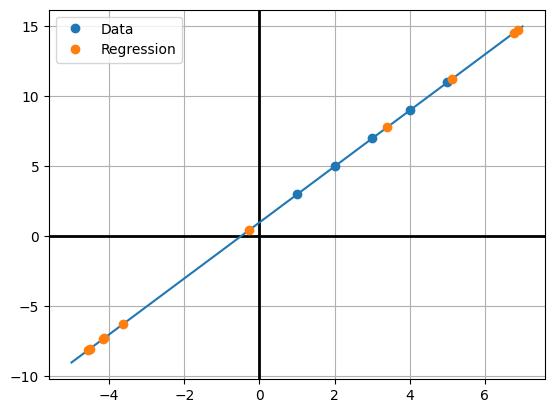

In [104]:
ys = np.array([linear(x) for x in points])

betas = np.linalg.inv(matrix_lin.T @ matrix_lin) @ matrix_lin.T @ ys
print(betas)


def linear_regression(x):
    return betas[0] + betas[1]*x



fig, ax = plt.subplots()

ax.axvline(x=0, color='black', lw=2)
ax.axhline(y=0, color='black', lw=2)
x_samples = np.random.uniform(-5, 7, 10)

ax.plot(xs, linear(xs), color = 'C0')
ax.plot(points, linear(points), 'o', color = 'C0', label = 'Data')

ax.plot(x_samples, linear_regression(x_samples), 'o', color = 'C1', label = 'Regression')
ax.grid(True)
ax.legend()


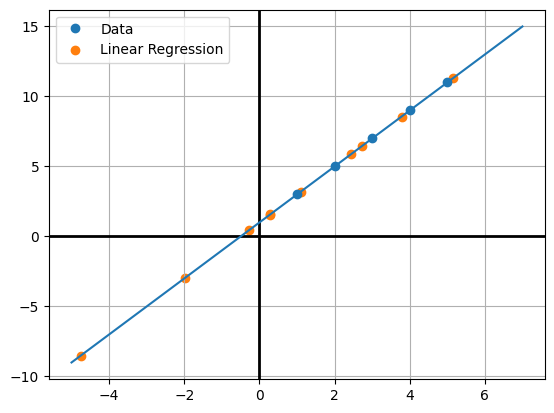

In [105]:
# With classes:

fig, ax = plt.subplots()

ax.axvline(x=0, color='black', lw=2)
ax.axhline(y=0, color='black', lw=2)
x_samples = np.random.uniform(-5, 7, 10)

ax.plot(xs, linear(xs), color = 'C0')
ax.plot(points, linear(points), 'o', color = 'C0', label = 'Data')

ax.grid(True)




LR = LinearRegression(points, ys)
LR.plot(ax, x_samples)

ax.legend()


# Do both linear and quadratic regression for a quadratic function

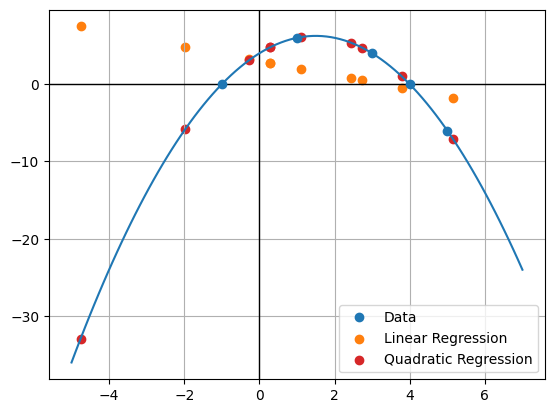

In [108]:


def quadratic(x):
    return -x**2 +3*x + 4

x_points = np.array([-1., 1., 3., 4., 5.])    
y_points = quadratic(x_points)
fig, ax = plt.subplots()

#Make axes
ax.axvline(x=0, color='black', lw=1)
ax.axhline(y=0, color='black', lw=1)
ax.grid(True)

#Plot the function
ax.plot(xs, quadratic(xs), color = 'C0')
ax.plot(x_points, y_points, 'o', color = 'C0', label = 'Data')


#Perform linear and quadratic regression and plot it

LR = LinearRegression(x_points, y_points)
LR.plot(ax, x_samples, color='C1')

QR = QuadraticRegression(x_points, y_points)
QR.plot(ax, x_samples, color='C3')

ax.legend()